Found 1 images belonging to 2 classes.
Model said no_train/nt_test_000001.jpg contained a train (0.9964497089385986), but it didn't:


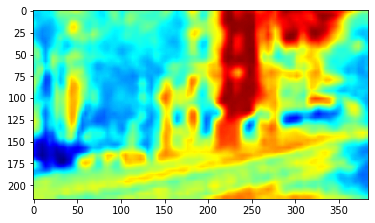

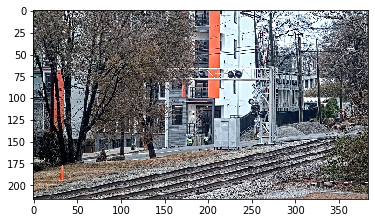

Misclassified 1 images.


In [12]:
from utils import GradCamHeatMapper, image_count
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import math

directory = 'data/test/'
num_samples = image_count(directory + 'train/') + image_count(directory + 'no_train/')
batch_size = 16
img_gen = ImageDataGenerator(rescale = 1./255)
height = 1080
width = 1920
scale_factor = 0.2
scaled_height = int(height * scale_factor)
scaled_width = int(width * scale_factor)
sample_gen = img_gen.flow_from_directory(
        'data/test/',
        target_size=(scaled_height, scaled_width),
        batch_size=batch_size,
        class_mode='binary',
        shuffle=False)
model_dir = 'train_detection_cnn'
model = load_model(model_dir)
grad_cam_heat_mapper = GradCamHeatMapper(model_dir)
y_true = sample_gen.classes
y_pred = model.predict_generator(sample_gen, steps = math.ceil(num_samples / batch_size)).flatten()
pred_class_idxs = np.around(y_pred)
filenames = sample_gen.filenames
class_idx_dict = sample_gen.class_indices
miss_count = 0
for i in range(num_samples):
    if int(pred_class_idxs[i]) != y_true[i]:
        miss_count += 1
        if y_true[i] == class_idx_dict['no_train']:
            print('Model said {} contained a train ({}), but it didn\'t:'.format(filenames[i], y_pred[i]))
        else:
            print('Model said {} did not contain a train ({}), but it did:'.format(filenames[i], y_pred[i]))
        batch_number = i // batch_size
        img_number = i % batch_size
        img = sample_gen[batch_number][0][img_number]
        img_heatmap = grad_cam_heat_mapper.get_heat_map(img)
        plt.imshow(img_heatmap)
        plt.show()
        plt.imshow(img)
        plt.show()

print('Misclassified {} images.'.format(miss_count))